# Exporatory Data Analysis
This first section dives into the data and explores it to see if we can see any trends or simlarities that could be intersting to work on. We start with importing the necessary packages. 

## Quick Description of the data
**Source:** [Credit card Fraud Detection Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [59]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math
from sklearn.manifold import TSNE

In [60]:
def plot_per_column_distribution(df, max_graphs=20, graphs_per_row=4):
    """
    This function visualizes the distributions of columns in a DataFrame.
    It's meant to give me a quick, interpretable sense of how different
    features are distributed — especially helpful during EDA (Exploratory Data Analysis).

    Args:
        df (pd.DataFrame): Input dataset.
        max_graphs (int): Maximum number of graphs to show.
        graphs_per_row (int): Number of graphs to show per row in the figure.
    """
    
    # Keep only columns with a reasonable number of unique values (to avoid messy plots)
    eligible_cols = [col for col in df.columns if 1 < df[col].nunique() < 50]
    selected_df = df[eligible_cols]

    n_cols = len(selected_df.columns)
    n_rows = math.ceil(min(n_cols, max_graphs) / graphs_per_row)

    # Set figure size dynamically based on layout
    plt.figure(figsize=(6 * graphs_per_row, 4 * n_rows))

    for i, col in enumerate(selected_df.columns[:max_graphs]):
        plt.subplot(n_rows, graphs_per_row, i + 1)

        # Check if column is numeric or categorical
        if pd.api.types.is_numeric_dtype(selected_df[col]):
            selected_df[col].hist(bins=15, edgecolor='black')
        else:
            selected_df[col].value_counts().plot(kind='bar')

        plt.title(f'{col} (col {i})')
        plt.ylabel('Counts')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [61]:
def plot_correlation_matrix(df, graph_width=12):
    """
    This function generates a correlation matrix heatmap for the dataset.
    It's useful during EDA to identify linear relationships between numeric features.

    Args:
        df (pd.DataFrame): The input DataFrame.
        graph_width (int): The width (and height) of the correlation matrix plot.
    """

    # Use the name attribute if available; fallback to "DataFrame"
    filename = getattr(df, 'dataframeName', 'DataFrame')

    # Drop columns that contain all NaNs
    df = df.dropna(axis='columns')

    # Drop constant columns (with only one unique value)
    df = df.loc[:, df.nunique() > 1]

    # If not enough numeric columns remain, skip plotting
    if df.shape[1] < 2:
        print(f"No correlation plot shown: Not enough non-constant, non-NaN columns ({df.shape[1]})")
        return

    # Compute correlation matrix
    corr = df.corr()

    # Set up figure size dynamically
    plt.figure(figsize=(graph_width, graph_width), dpi=80)

    # Plot the matrix using matshow
    cax = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()  # Show ticks at the bottom for x-axis
    plt.colorbar(cax)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.tight_layout()
    plt.show()


In [62]:
def plot_correlation_matrix(df, graph_width=12):
    """
    This function generates a correlation matrix heatmap for the dataset.
    It's useful during EDA to identify linear relationships between numeric features.

    Args:
        df (pd.DataFrame): The input DataFrame.
        graph_width (int): The width (and height) of the correlation matrix plot.
    """

    # Use the name attribute if available; fallback to "DataFrame"
    filename = getattr(df, 'dataframeName', 'DataFrame')

    # Drop columns that contain all NaNs
    df = df.dropna(axis='columns')

    # Drop constant columns (with only one unique value)
    df = df.loc[:, df.nunique() > 1]

    # If not enough numeric columns remain, skip plotting
    if df.shape[1] < 2:
        print(f"No correlation plot shown: Not enough non-constant, non-NaN columns ({df.shape[1]})")
        return

    # Compute correlation matrix
    corr = df.corr()

    # Set up figure size dynamically
    plt.figure(figsize=(graph_width, graph_width), dpi=80)

    # Plot the matrix using matshow
    cax = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()  # Show ticks at the bottom for x-axis
    plt.colorbar(cax)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)

    # Replace plt.tight_layout() with plt.subplots_adjust()
    plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.2)  # Adjust spacing manually
    plt.show()

In [63]:
n_rows_to_read = None

df_credit = pd.read_csv('./input/creditcard.csv', delimiter=',', nrows=n_rows_to_read)
df_credit.dataframeName = 'creditcard.csv'

# Store dimensions of the dataset
n_rows, n_cols = df_credit.shape

# Print out basic information for sanity check
print(f'There are {n_rows} rows and {n_cols} columns in the dataset.')

There are 284807 rows and 31 columns in the dataset.


In [64]:
df_credit.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


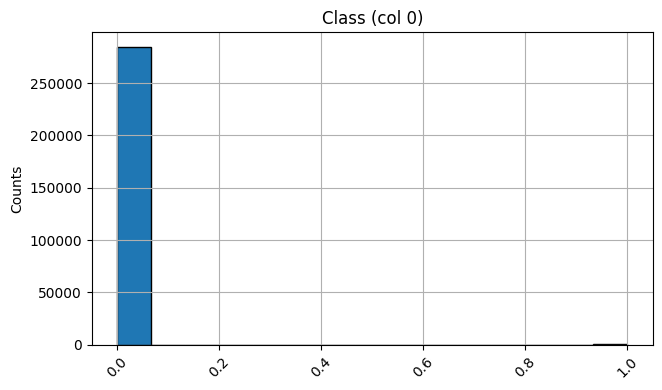

In [66]:
plot_per_column_distribution(df_credit, 7, 4)

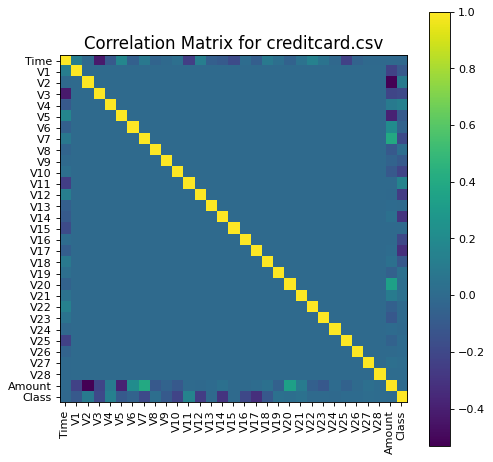

In [67]:
plot_correlation_matrix(df_credit, 7)

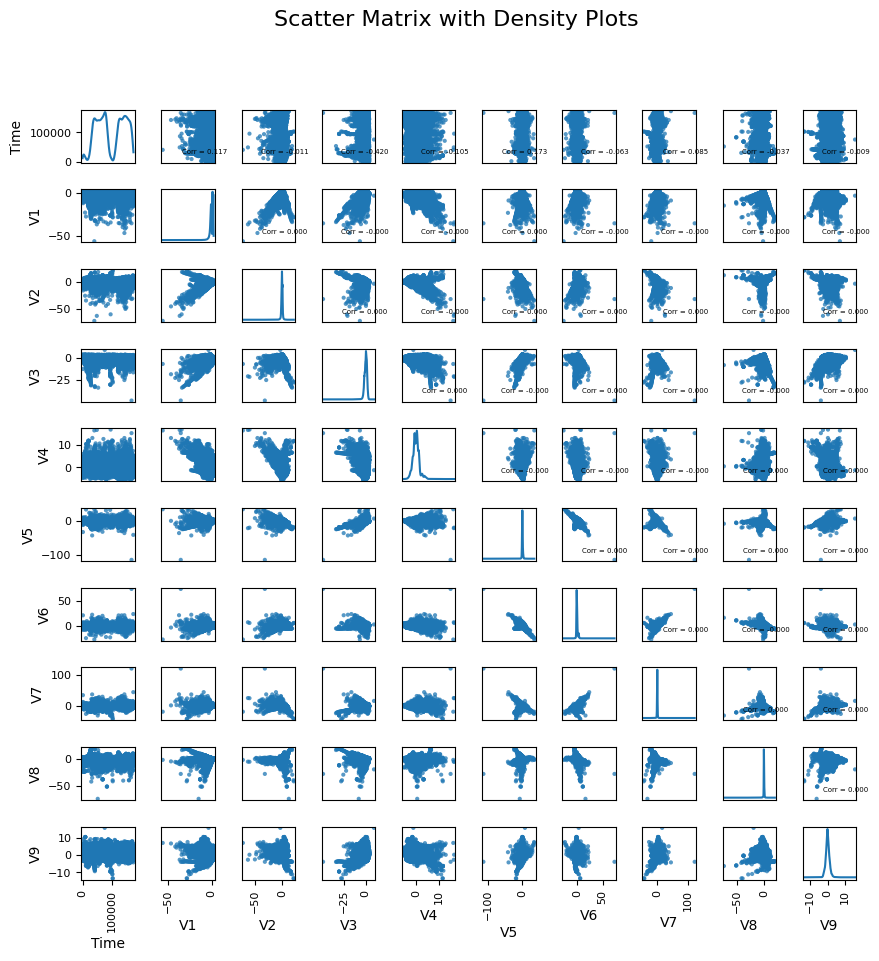

In [74]:
plot_scatter_matrix(df_credit, 10, 5)

### Observations from the data

1. Data overview & class balance
   - Loaded the full dataset (284 807 records × 31 features).
   - Class distribution is extremely skewed: ~99.8 % non-fraudulent vs. ~0.2 % fraudulent.
   - Model design must address this imbalance (e.g. resampling, cost-sensitive loss, anomaly detection).

2. Correlation Matrix
   - Computed Pearson correlations over all numeric features (Time, V1–V28, Amount) and Class.
   - PCA-derived “V” components are essentially orthogonal—off-diagonals hover near zero.
   - Only moderate associations:
     - Time ↔ V3 (ρ ≈ –0.42)
     - Time ↔ V1 (ρ ≈ +0.12)

3. Scatter‐matrix & KDE insights
   - Marginal density plots show each feature roughly centered at zero (as expected for PCA outputs).
   - Pairwise scatterplots reveal no obvious linear separability between classes.
   - Reaffirms that apart from the Time–V3 link, individual features lack strong discriminative power.

4. Modeling implications
   - Class imbalance: implement strategies such as SMOTE/undersampling, class weights, or one-class methods.
   - Feature decorrelation: multicollinearity is not a concern thanks to PCA.
   - Temporal signal: explore engineered time-based features given its moderate link with V1 and V3.
   - Feature interactions: fraud detection will likely rely on combining multiple components rather than any single variable.


---
## In-depth Exploratory Data Analysis

### Amount & log-Amount distributions by class

**Observations from the graphs below**
1. Raw Amoung Distirbution by class
   - Extreme right skew in both classes: over 90 % of all transactions are under $200, yet there’s a long tail reaching up to $40 000.
   - Fraudulent transactions (Class = 1) make up a much smaller share overall—but in the tail beyond $2 000 they represent a disproportionately large fraction, hinting that very large purchases are more likely to be fraudulent.
   - Majority overlap occurs at low amounts (<$50), so using raw amount alone would yield many false positives if you simply flagged high values.

2. Log-transformed Amount Distribution by class
   - Applying $log_{1p}$ compresses the skew and spreads out small values, making finer structure visible.
   - Legitimate transactions (blue) now form a smooth, unimodal curve centered around $log_{1p}(Amount)≈3$ (i.e.\ Amount≈$20).
   - Fraudulent transactions (orange) exhibit distinct spikes at several log-levels (around $log_{1p}≈1.5, 3.5, 5$), suggesting fraudsters often transact at particular “round” or threshold amounts.
   - Despite log scaling, there remains significant overlap between classes in the mid-range (log1p≈2–4), confirming that no single amount bucket cleanly separates fraud.

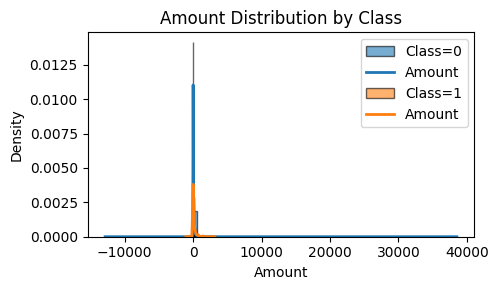

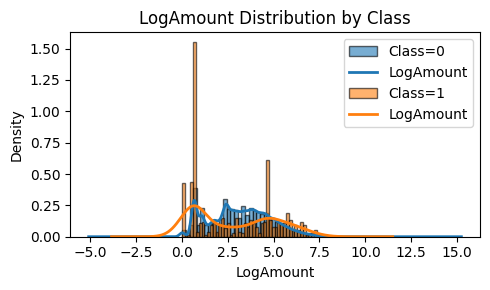

In [ ]:
for col in ['Amount', 'LogAmount']:
    if col == 'LogAmount':
        df_credit[col] = np.log1p(df_credit['Amount'])
    plt.figure(figsize=(5,3))
    for cls, color in zip([0,1], ['C0','C1']):
        subset = df_credit[df_credit['Class']==cls][col]
        # histogram + KDE via density histogram
        plt.hist(subset, bins=50, density=True, alpha=0.6,
                 label=f'Class={cls}', color=color, edgecolor='k')
        # simple KDE: gaussian smoothing
        subset.plot(kind='kde', color=color, linewidth=2)
    plt.title(f'{col} Distribution by Class')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Time-of-day fraude rate

**Observations from the graphs below**

1. Fraud Rate by hour of day
   - Night-time peaks: Fraud rate spikes between 02:00–05:00, reaching a maximum around hour 3 (~1.7 %), compared with a baseline of ~0.1–0.2 % during daytime.
   - Early morning bump: A secondary peak around 05:00 (~1.0 %) suggests fraudsters target early-morning hours when overall transaction volume is low.
   - Midday trough: Between 10:00–15:00, fraud rate falls to its lowest (~0.05–0.15 %)—possibly because legitimate transactions surge, diluting the fraud proportion.
   - Late-evening uptick: A small rise again around 22:00–23:00 (~0.2 %), indicating another window of elevated risk.

2. Fraud rate over time per minute
   - Sparse baseline: Most minutes have virtually zero fraud rate, reflecting the rarity of fraud events.
   - Clustered spikes: Noticeable surges in fraud rate around minute 100–300 (up to ~0.2), and very large spikes near minute 1500 (~0.5) and 1750 (~0.3).
   - Burst behavior: These sharp peaks indicate that fraud tends to occur in short-lived bursts rather than being uniformly distributed.
   - Variance due to small counts: Minute‐level aggregation can exaggerate fraud rate when only a handful of transactions occur; smoothing over longer windows (e.g., 5–15 minutes) may yield more stable signals.

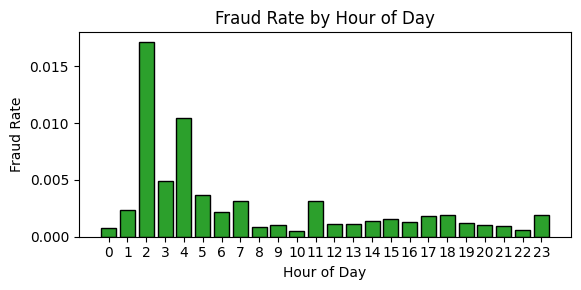

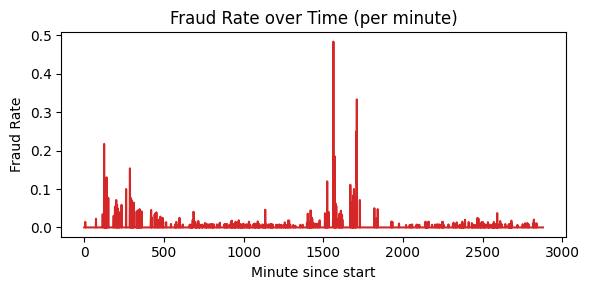

In [ ]:
# Time-of-day fraud rate

df_credit['Hour'] = (df_credit['Time'] // 3600) % 24
hourly = df_credit.groupby('Hour')['Class'].agg(['count','sum'])
hourly['fraud_rate'] = hourly['sum'] / hourly['count']

plt.figure(figsize=(6,3))
plt.bar(hourly.index, hourly['fraud_rate'], color='C2', edgecolor='k')
plt.xticks(hourly.index)
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Hour of Day')
plt.tight_layout()
plt.show()


# Temporal aggregation (per minute) & fraud rate

df_credit['Minute'] = df_credit['Time'] // 60
minutely = df_credit.groupby('Minute')['Class'].agg(['count','sum'])
minutely['fraud_rate'] = minutely['sum'] / minutely['count']

plt.figure(figsize=(6,3))
plt.plot(minutely.index, minutely['fraud_rate'], color='C3')
plt.xlabel('Minute since start')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate over Time (per minute)')
plt.tight_layout()
plt.show()

### Outlier detection (IQR) for Amount V1, and V3

**Observations from the data below**


- V3 extreme values are by far the strongest single‐feature fraud signal: flagging just 1.2 % of the dataset recovers nearly two-thirds of all fraud.
- V1 outliers also show substantial enrichment (~35 % of fraud in 2.5 % of transactions), making it a useful secondary indicator.
- Amount outliers alone have minimal predictive power—while they flag many transactions, they only modestly enrich for fraud.
- Implication for modeling: Threshold‐based filters on V3 (and V1) could serve as a high‐recall, low–false-positive pre-filter step before applying supervised classifiers.

In [ ]:
features = ['Amount', 'V1', 'V3']
outlier_info = []

for feat in features:
    Q1 = df_credit[feat].quantile(0.25)
    Q3 = df_credit[feat].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Corrected: Use inclusive='neither' to exclude both bounds
    is_outlier = df_credit[feat].between(lower, upper, inclusive='neither') == False
    total_out = is_outlier.sum()
    fraud_out = df_credit.loc[is_outlier, 'Class'].sum()
    outlier_info.append({
        'feature': feat,
        'total_outliers': int(total_out),
        'pct_outliers': total_out / len(df_credit) * 100,
        'fraud_outliers': int(fraud_out),
        'pct_fraud_outliers': fraud_out / df_credit['Class'].sum() * 100
    })

outlier_df = pd.DataFrame(outlier_info)
print("Outlier Summary (IQR method):")
print(outlier_df)

Outlier Summary (IQR method):
  feature  total_outliers  pct_outliers  fraud_outliers  pct_fraud_outliers
0  Amount           31904     11.201972              91           18.495935
1      V1            7062      2.479574             174           35.365854
2      V3            3363      1.180800             312           63.414634


### Class-conditional summaries & boxplots for V1 & V3

**Observations from the graphs below**
1. **V1 by class:** A strongly negative V1 score is a clear indicator of fraud—both the location and dispersion differ markedly between classes.
2. **V3 by class:** V3 exhibits the strongest single‐feature separation—transactions with highly negative V3 are overwhelmingly likely to be fraudulent.


Mean & Median of V1, V3 by Class:
             V1                  V3          
           mean    median      mean    median
Class                                        
0      0.008258  0.020023  0.012171  0.182158
1     -4.771948 -2.342497 -7.033281 -5.075257


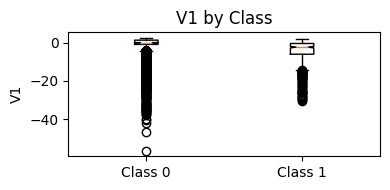

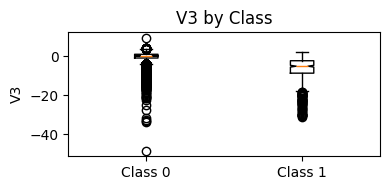

In [ ]:
summary = df_credit.groupby('Class')[['V1', 'V3']].agg(['mean', 'median'])
print("\nMean & Median of V1, V3 by Class:")
print(summary)

for feat in ['V1', 'V3']:
    plt.figure(figsize=(4, 2))
    data = [df_credit[df_credit['Class'] == c][feat] for c in [0, 1]]
    # Updated: Use tick_labels instead of labels
    plt.boxplot(data, tick_labels=['Class 0', 'Class 1'], notch=True)
    plt.title(f'{feat} by Class')
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()